Tasks

In [43]:
#importing all necessary libraries
import pandas as pd #pandas
import numpy as np #numpy  
import matplotlib.pyplot as plt #matplotlib
plt.style.use('fivethirtyeight')    #Giving Style
import seaborn as sns   #seaborn for heatmaps
from datetime import datetime   # to get datetime


In [44]:
#Getting CSV
df=pd.read_csv('AI.csv')#reading file
#getting distinct companies and number of it
dis=list(set(df['Company']))
print(df,"\n\n")
print(dis,"\n This is the distinct set of companies.")

             Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0      01-01-2015  OpenAI                 5.92               0.63   
1      02-01-2015  OpenAI                 5.41               1.81   
2      03-01-2015  OpenAI                 4.50               0.61   
3      04-01-2015  OpenAI                 5.45               0.95   
4      05-01-2015  OpenAI                 3.40               1.48   
...           ...     ...                  ...                ...   
10954  27-12-2024    Meta               100.19             103.54   
10955  28-12-2024    Meta                99.12             102.37   
10956  29-12-2024    Meta                98.95             103.11   
10957  30-12-2024    Meta               100.74             103.21   
10958  31-12-2024    Meta               100.08             103.41   

       AI_Revenue_Growth_% Event  Stock_Impact_%  
0                   -36.82   NaN           -0.36  
1                    80.59   NaN            0.41  
2                 

In [45]:
#We have been given data of three companies
#separating the data
df1=df.loc[(df['Company']=='Google')].reset_index()
df2=df.loc[(df['Company']=='Meta')].reset_index()
df3=df.loc[(df['Company']=='OpenAI')].reset_index()

#creating new csvs (if necesary)
df1.to_csv('Google.csv')
df2.to_csv('Meta.csv')
df3.to_csv('OpenAI.csv')


In [46]:
#Getting the desired Stats.

#Avg R&D spending, Avg AI Revenue by company.

#Getting stats for Google (df1)
sG=df1['R&D_Spending_USD_Mn'].sum()
rG=df1['AI_Revenue_USD_Mn'].sum()
stockImpactG=df1['Stock_Impact_%'].sum()
lG=len(df1)
nG=sG/lG
avgrG=rG/lG
sIG=stockImpactG/lG
roiG=rG/sG
print(f"{nG} is the Average R&D Expenditure of Google")
print(f"{avgrG} is the Average Revenue of Google")
print(f"{sIG} is the Stock Impact of Google")
print(f"{roiG} is the ROI of Google","\n\n\n")

#Getting stats for Meta (df2)
sM=df2['R&D_Spending_USD_Mn'].sum()
rM=df2['AI_Revenue_USD_Mn'].sum()
stockImpactM=df2['Stock_Impact_%'].sum()
lM=len(df2)
nM=sM/lM
avgrM=rM/lM
sIM=stockImpactM/lM
roiM=rM/sM
print(f"{nM} is the Average R&D Expenditure of Meta")
print(f"{avgrM} is the Average Revenue of Meta")
print(f"{sIM} is the Stock Impact of Meta")
print(f"{roiM} is the ROI of Meta","\n\n\n")


#Getting stats for OpenAI (df3)
sO=df3['R&D_Spending_USD_Mn'].sum()
rO=df3['AI_Revenue_USD_Mn'].sum()
stockImpactO=df3['Stock_Impact_%'].sum()
lO=len(df3)
nO=sO/lO
avgrO=rO/lO
sIO=stockImpactO/lO
roiO=rO/sO
print(f"{nO} is the Average R&D Expenditure of OpenAI")
print(f"{avgrO} is the Average Revenue of OpenAI")
print(f"{sIO} is the Stock Impact of OpenAI")
print(f"{roiO} is the ROI of OpenAI","\n\n\n")


115.88862304954831 is the Average R&D Expenditure of Google
77.8807500684369 is the Average Revenue of Google
0.02620859567478785 is the Stock Impact of Google
0.6720310244357541 is the ROI of Google 



72.41529427867506 is the Average R&D Expenditure of Meta
51.90851902545853 is the Average Revenue of Meta
0.00976183958390364 is the Stock Impact of Meta
0.7168170694121533 is the ROI of Meta 



7.249594853545031 is the Average R&D Expenditure of OpenAI
2.5904434711196274 is the Average Revenue of OpenAI
0.04070900629619491 is the Stock Impact of OpenAI
0.35732251573381485 is the ROI of OpenAI 





In [47]:
#Creating data frame of the obtained sets.
dfStats=pd.DataFrame({'Company':['Google','Meta','OpenAI'],
                      'Avg R&D Expenditure':[sG,sM,sO],
                      'Avg AI Revenue':[rG,rM,rO],
                      'Avg Stock Impact %':[avgrG,avgrM,avgrO],
                      'ROI':[roiG,roiM,roiO]})
print(dfStats)


  Company  Avg R&D Expenditure  Avg AI Revenue  Avg Stock Impact %       ROI
0  Google            423341.14       284498.38           77.880750  0.672031
1    Meta            264533.07       189621.82           51.908519  0.716817
2  OpenAI             26482.77         9462.89            2.590443  0.357323


In [48]:
#Calculated that which company spent highest on R&D 
#Max R&D expenditure.
maxExp=max([sO,sM,sG])
#maxExpComp=dfStats.loc[dfStats['Avg R&D Expenditure']==maxExp, 'Company'].iloc[0]
#print(f"{maxExpComp} has maximum R&D of {maxExp} million USD")
if max([sO,sM,sG])==sO :
    print(f"OpenAI has maximum R&D of {maxExp} million USD")
if max([sO,sM,sG])==sM :
    print(f"Meta has maximum R&D of {maxExp} million USD")
else:
    print(f"Google has maximum R&D of {maxExp} million USD")




Google has maximum R&D of 423341.14 million USD


In [49]:
#Calculating the company with fastest revenue growth in 10 years.
#i.e. company with max net revenue over these 10 years.

df1['revGrowth'] = df1['AI_Revenue_USD_Mn'] * df1['AI_Revenue_Growth_%'] / 100
df2['revGrowth'] = df2['AI_Revenue_USD_Mn'] * df2['AI_Revenue_Growth_%'] / 100
df3['revGrowth'] = df3['AI_Revenue_USD_Mn'] * df3['AI_Revenue_Growth_%'] / 100
mG=df1['revGrowth'].sum()
mM=df2['revGrowth'].sum()
mO=df3['revGrowth'].sum()
revList= [mG,mM,mO]
if max(revList)==mG:
    print(f"Fastest growth in revenue is shown by Google with {mG} net revenue growth(calculated over the daily revenue allotment) in the period of 10 years")
elif max(revList)==mM:
    print(f"Fastest growth in revenue is shown by Meta with {mM} net revenue growth(calculated over the daily revenue allotment) in the period of 10 years")
else:
    print(f"Fastest growth in revenue is shown by OpenAI with {mO} net revenue growth(calculated over the daily revenue allotment) in the period of 10 years")


Fastest growth in revenue is shown by Google with 645690.7288040001 net revenue growth(calculated over the daily revenue allotment) in the period of 10 years


Correlations

In [50]:
#HeatMap of Correlation   
dfCorrSort=df[['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn', 'Stock_Impact_%']].copy()
#print(dfCorrSort,"\n\n\n")
#dfCorrSort.to_csv('NewCSV.csv')
#print("This is the data ")

corr1=dfCorrSort['R&D_Spending_USD_Mn'].corr(dfCorrSort['AI_Revenue_USD_Mn'])
print(f"{corr1} is the Correlation between R&D Spending and AI Revenue.\n")

corr2=dfCorrSort['R&D_Spending_USD_Mn'].corr(dfCorrSort['Stock_Impact_%'])
print(f"{corr2} is the Correlation between R&D Spending and Stock_Impact_%.\n")

corr3=dfCorrSort['Stock_Impact_%'].corr(dfCorrSort['AI_Revenue_USD_Mn'])
print(f"{corr3} is the Correlation between Stock_Impact_% and AI Revenue.\n")

0.9350300088423973 is the Correlation between R&D Spending and AI Revenue.

-0.0046283860787147265 is the Correlation between R&D Spending and Stock_Impact_%.

-1.7054447458873356e-05 is the Correlation between Stock_Impact_% and AI Revenue.



Visualisation and Plots

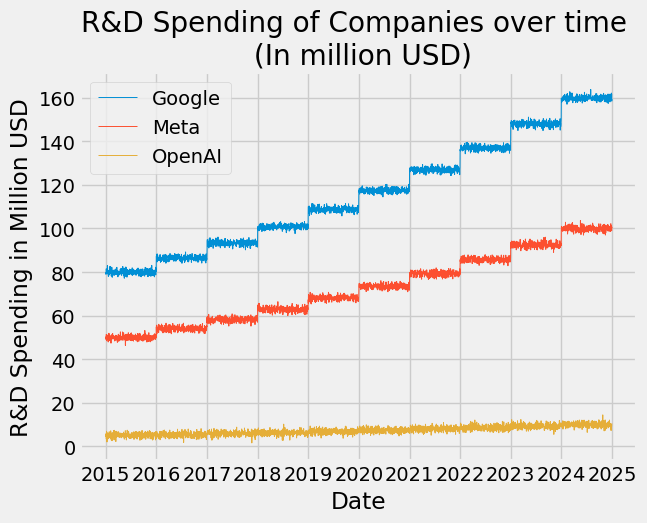

In [51]:
#plotting R&D spending Company wise along the time.

df1['Date']=pd.to_datetime(df1['Date'], format='mixed',dayfirst=True)
#df1 = df1.dropna()
plt.plot(df1['Date'],df1['R&D_Spending_USD_Mn'], label='Google',linewidth=0.7)

df2['Date']=pd.to_datetime(df2['Date'], format='mixed',dayfirst=True)
#df2 = df2.dropna()
plt.plot(df2['Date'],df2['R&D_Spending_USD_Mn'], label='Meta',linewidth=0.7)

df3['Date']=pd.to_datetime(df3['Date'], format='mixed',dayfirst=True)
#df3 = df3.dropna()
plt.plot(df3['Date'],df3['R&D_Spending_USD_Mn'], label='OpenAI',linewidth=0.7)

plt.title('R&D Spending of Companies over time \n (In million USD)')
plt.xlabel('Date')
plt.ylabel('R&D Spending in Million USD')
plt.legend()
plt.show()

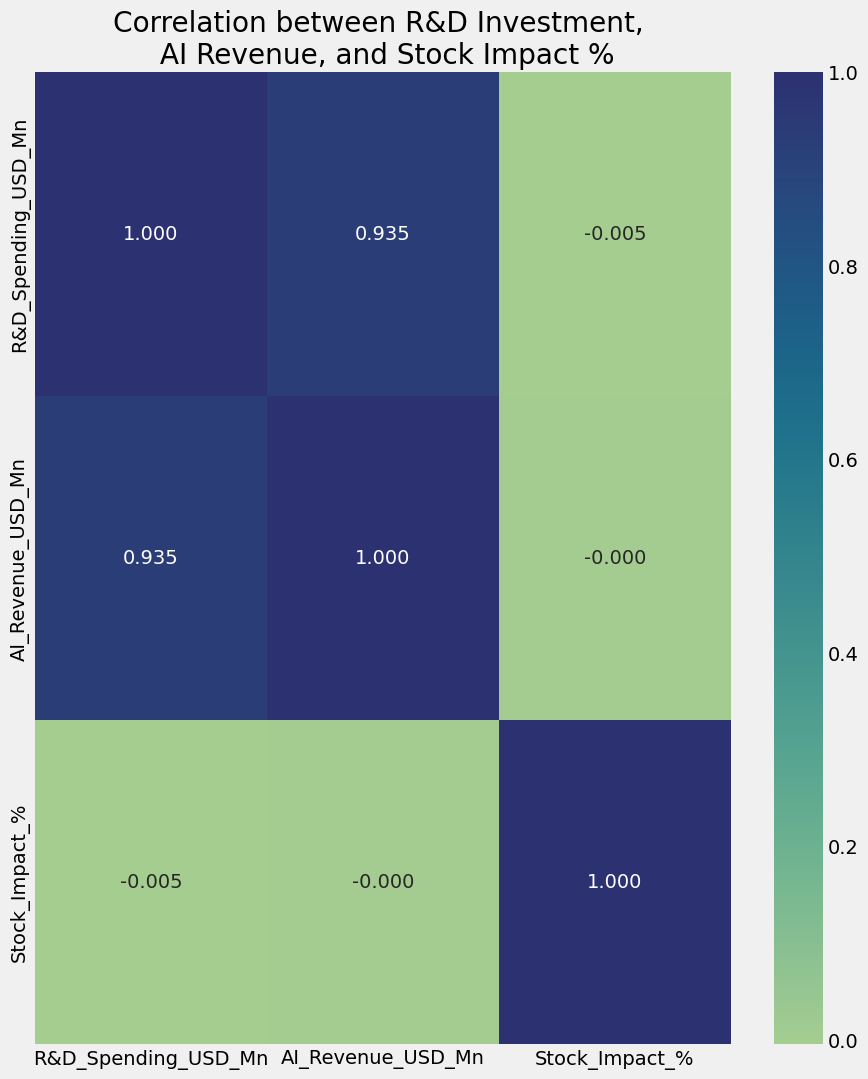

In [52]:
#plotting the Heat map for correlation between R&D Exp., AI Rev., and Stock Imp.%.
#heatmap plot of correlation between two parameters is not possible as it is a single value.

dfCorrGraph=dfCorrSort.corr()
plt.figure(figsize=(10, 12))
plt.title('Correlation between R&D Investment, \n AI Revenue, and Stock Impact %')
sns.heatmap(dfCorrGraph, annot=True, fmt=".3f", cmap="crest")
plt.show()


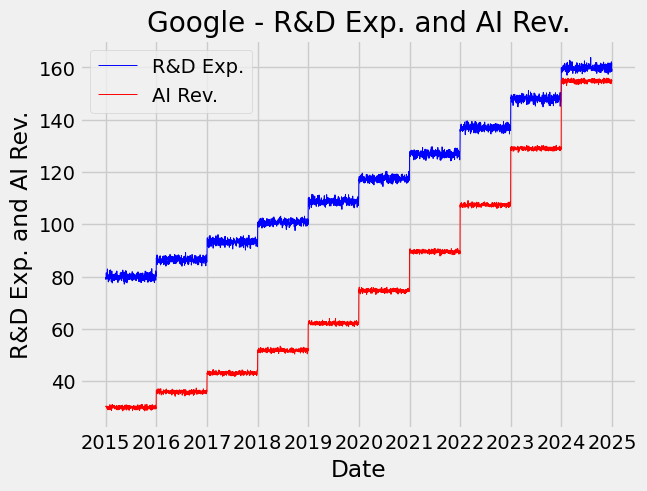

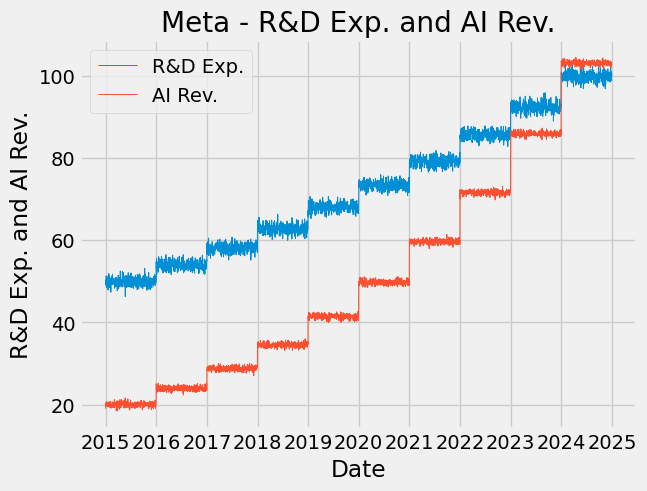

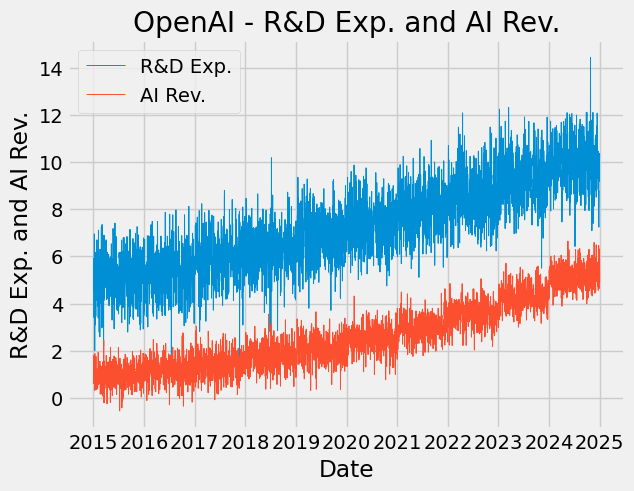

In [53]:

#R&D Exp. and Revenue plots per company.
#Google
plt.title('Google - R&D Exp. and AI Rev.')
plt.plot(df1['Date'],df1['R&D_Spending_USD_Mn'],linewidth='0.7',label='R&D Exp.',color="blue")
plt.plot(df1['Date'],df1['AI_Revenue_USD_Mn'],linewidth='0.7',label='AI Rev.',color="red")
plt.xlabel('Date')
plt.ylabel('R&D Exp. and AI Rev.')
plt.legend()
plt.show()
#Meta
plt.title('Meta - R&D Exp. and AI Rev.')
plt.plot(df2['Date'],df2['R&D_Spending_USD_Mn'],linewidth='0.7',label='R&D Exp.')
plt.plot(df2['Date'],df2['AI_Revenue_USD_Mn'],linewidth='0.7',label='AI Rev.')
plt.xlabel('Date')
plt.ylabel('R&D Exp. and AI Rev.')
plt.legend()
plt.show()
#OpenAI
plt.title('OpenAI - R&D Exp. and AI Rev.')
plt.plot(df3['Date'],df3['R&D_Spending_USD_Mn'],linewidth='0.7',label='R&D Exp.')
plt.plot(df3['Date'],df3['AI_Revenue_USD_Mn'],linewidth='0.7',label='AI Rev.')
plt.xlabel('Date')
plt.ylabel('R&D Exp. and AI Rev.')
plt.legend()
plt.show()


In [54]:


#Top ROI Company
dfROI=dfStats[['Company','ROI']].copy()
dfROIsorted=dfROI.sort_values(by='ROI', ascending=False)
print(dfROIsorted,'\n',"This is the list of top 3 Companies with max ROI in order.\n")
print("**Ignore the index**")



  Company       ROI
1    Meta  0.716817
0  Google  0.672031
2  OpenAI  0.357323 
 This is the list of top 3 Companies with max ROI in order.

**Ignore the index**


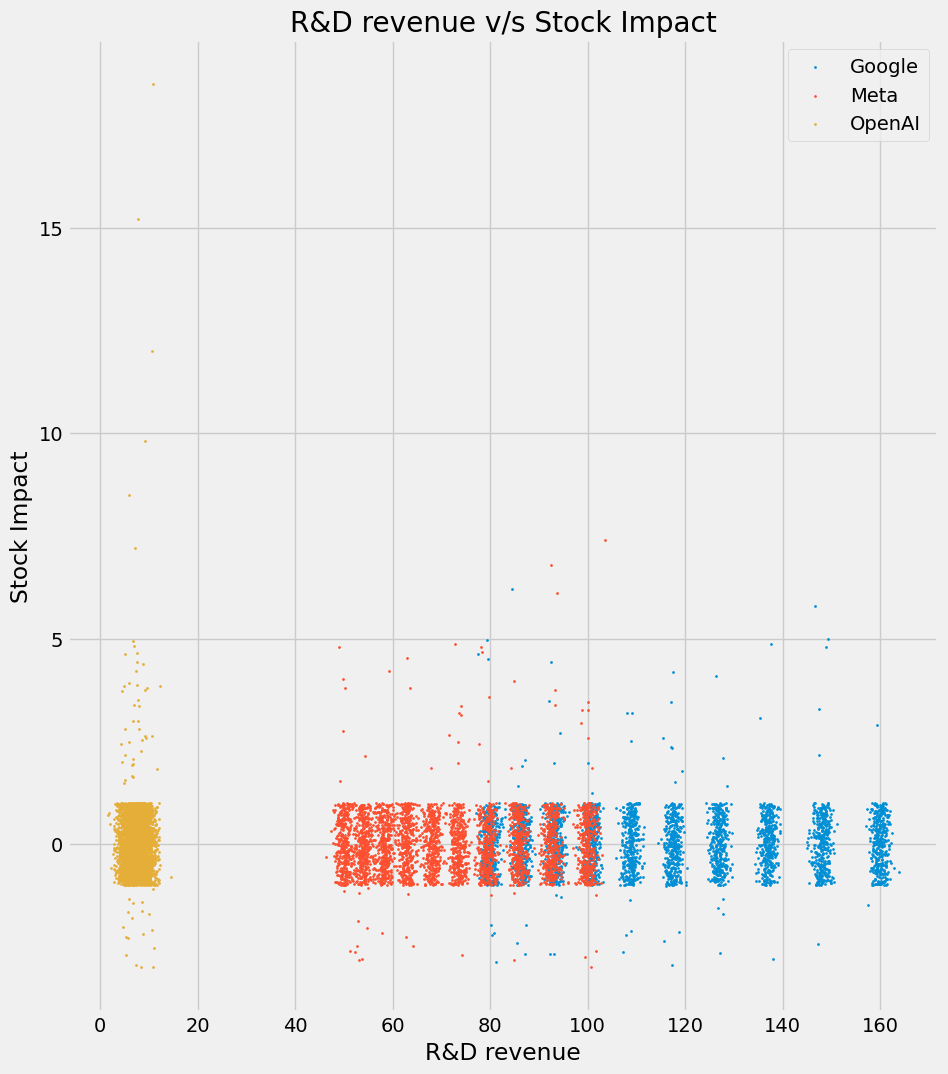

In [55]:
#ScatterPlot
plt.figure(figsize=(10, 12))
plt.title('R&D revenue v/s Stock Impact')
plt.xlabel('R&D revenue')
plt.ylabel('Stock Impact')
#plt.scatter(df1['R&D_Spending_USD_Mn'],df1['Stock_Impact_%'],label='Google',s=abs(df1['Stock_Impact_%']) * 10) if we expect a better view of dots.
plt.scatter(df1['R&D_Spending_USD_Mn'],df1['Stock_Impact_%'],label='Google',s=2)
plt.scatter(df2['R&D_Spending_USD_Mn'],df2['Stock_Impact_%'],label='Meta',s=2)
plt.scatter(df3['R&D_Spending_USD_Mn'],df3['Stock_Impact_%'],label='OpenAI',s=2)
plt.legend()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

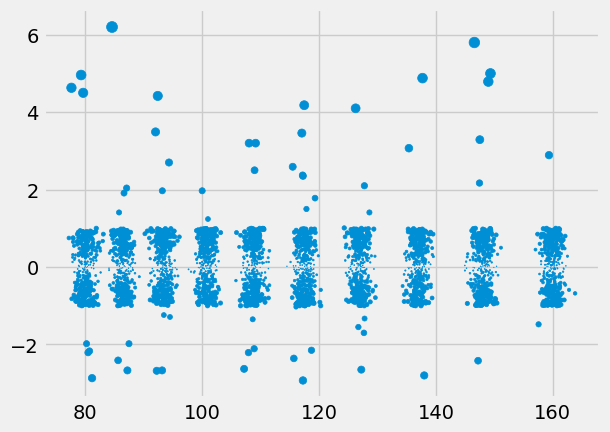

In [56]:
#Individual scatter plot of R&D_Spending_USD_Mn v/s Stock_Impact_% for Google.
plt.scatter(df1['R&D_Spending_USD_Mn'],df1['Stock_Impact_%'],label='Google',s=abs(df1['Stock_Impact_%']) * 10) #if we expect a better view of dots.
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

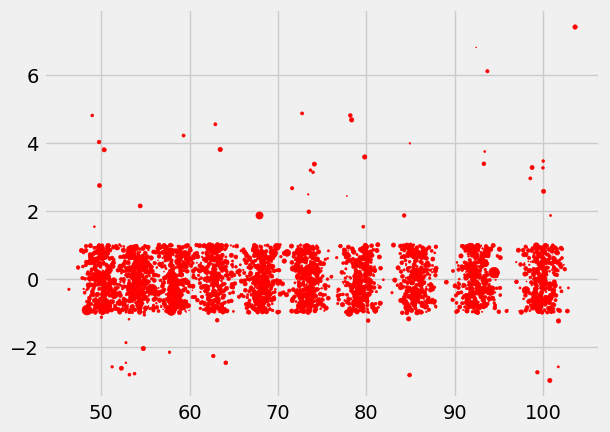

In [57]:
#Individual scatter plot of R&D_Spending_USD_Mn v/s Stock_Impact_% for Meta.
plt.scatter(df2['R&D_Spending_USD_Mn'],df2['Stock_Impact_%'],label='Meta',s=abs(df1['Stock_Impact_%']) * 10, color='red')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

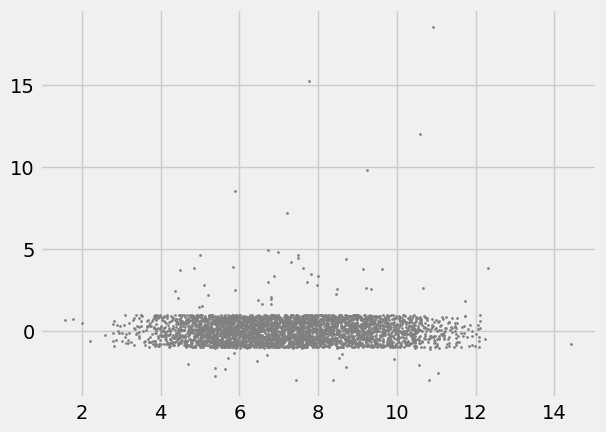

In [58]:
#Individual scatter plot of R&D_Spending_USD_Mn v/s Stock_Impact_% for OpenAI.
plt.scatter(df3['R&D_Spending_USD_Mn'],df3['Stock_Impact_%'],label='OpenAI',s=2, color='grey')
plt.show

In [59]:
#Events of max pos. or neg. stock impact.
dfEvent=df.dropna(subset='Event').copy()
dfEventSorted=dfEvent.sort_values(by='Stock_Impact_%', ascending=False)
print(dfEventSorted.head(2),"\n\n Above are the events that lead to maximum positive stock impact.\n\n\n")
print(dfEventSorted.tail(2).sort_values(by='Stock_Impact_%', ascending=True),"\n\n Above are the events that lead to maximum negative stock impact.\n\n")
print("**Ignore the index**")


            Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
3408  01-05-2024  OpenAI                10.91               5.34   
2994  14-03-2023  OpenAI                 7.78               4.05   

      AI_Revenue_Growth_%                      Event  Stock_Impact_%  
3408               434.27  GPT-5 release (predicted)            18.5  
2994               304.57              GPT-4 release            15.2   

 Above are the events that lead to maximum positive stock impact.



             Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
3350   04-03-2024  OpenAI                10.82               4.77   
10785  11-07-2024    Meta               100.78             102.92   

       AI_Revenue_Growth_%                        Event  Stock_Impact_%  
3350                376.53  AI Ads Optimization upgrade           -3.00  
10785               414.60      AI ethics policy update           -2.99   

 Above are the events that lead to maximum negative stock impact.


**Ignore th